<a href="https://colab.research.google.com/github/ByteBoss-ai/Fraud-Detection/blob/main/CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Loading Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
)
from imblearn.over_sampling import SMOTE

***1. Exploring Dataset***

In [3]:
# 1. Loading Dataset
df = pd.read_csv("creditcard.csv")

In [4]:
#Check Dataset
print("No. of rows: ",df.shape[0]," No. of columns: ", df.shape[1])

No. of rows:  99121  No. of columns:  31


In [5]:
#Exploring the Dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
#Exploring the Dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
99116,66970,1.383003,-1.100025,0.514116,-1.264196,-1.560304,-0.735428,-0.929887,-0.144582,-1.879341,...,-0.142905,-0.065429,0.072115,0.379578,0.258220,-0.200665,0.040191,0.027242,50.00,0.0
99117,66971,-1.589012,0.449203,1.341944,0.152955,-0.071734,-0.711538,1.634046,-0.260976,-0.533781,...,0.042474,0.129532,-0.198981,0.392406,0.806917,-0.402612,0.213197,0.145531,229.32,0.0
99118,66972,0.990739,-0.322129,1.133347,0.640936,-0.212743,1.755410,-0.906331,0.629480,0.798532,...,0.037755,0.485242,0.147119,-0.898490,-0.034857,0.442509,0.092761,0.014600,11.50,0.0
99119,66972,-0.576857,1.215356,0.943351,-0.498420,0.879226,0.015361,0.954065,-0.272786,0.090732,...,-0.452060,-0.774950,-0.221622,-0.907269,0.019926,0.079747,0.122782,-0.241301,1.98,0.0
99120,66973,-1.014594,-0.513014,1.924881,-1.623481,-0.235055,0.456966,-0.287827,0.313670,-0.683070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Exploring the Dataset further
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,...,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000
mean,42213.815861,-0.262004,-0.033117,0.676050,0.162447,-0.279002,0.094272,-0.108333,0.056136,-0.045671,...,-0.030524,-0.109128,-0.036949,0.009122,0.132233,0.026676,0.000626,0.001712,98.115561,0.002240
std,16959.616226,1.860400,1.658620,1.325288,1.350168,1.356758,1.301340,1.212608,1.207004,1.122196,...,0.719862,0.634433,0.634429,0.594982,0.441032,0.494743,0.393954,0.325556,265.286809,0.047273
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33380.000000,-1.027973,-0.599728,0.177007,-0.712131,-0.898502,-0.647594,-0.600418,-0.137605,-0.699085,...,-0.224552,-0.531169,-0.176426,-0.323574,-0.131810,-0.325217,-0.062543,-0.005363,7.570000,0.000000
50%,44112.000000,-0.260205,0.077775,0.754452,0.191743,-0.314473,-0.157188,-0.069316,0.073908,-0.118182,...,-0.057606,-0.083721,-0.049300,0.064890,0.170100,-0.070453,0.009817,0.023319,26.430000,0.000000
75%,55528.000000,1.153321,0.735516,1.376924,1.032558,0.249811,0.486727,0.415134,0.359821,0.560705,...,0.119279,0.308336,0.081573,0.406241,0.419958,0.301190,0.082976,0.076518,89.000000,0.000000
max,66973.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [8]:
#Checking whether dataset has null/missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


No missing value

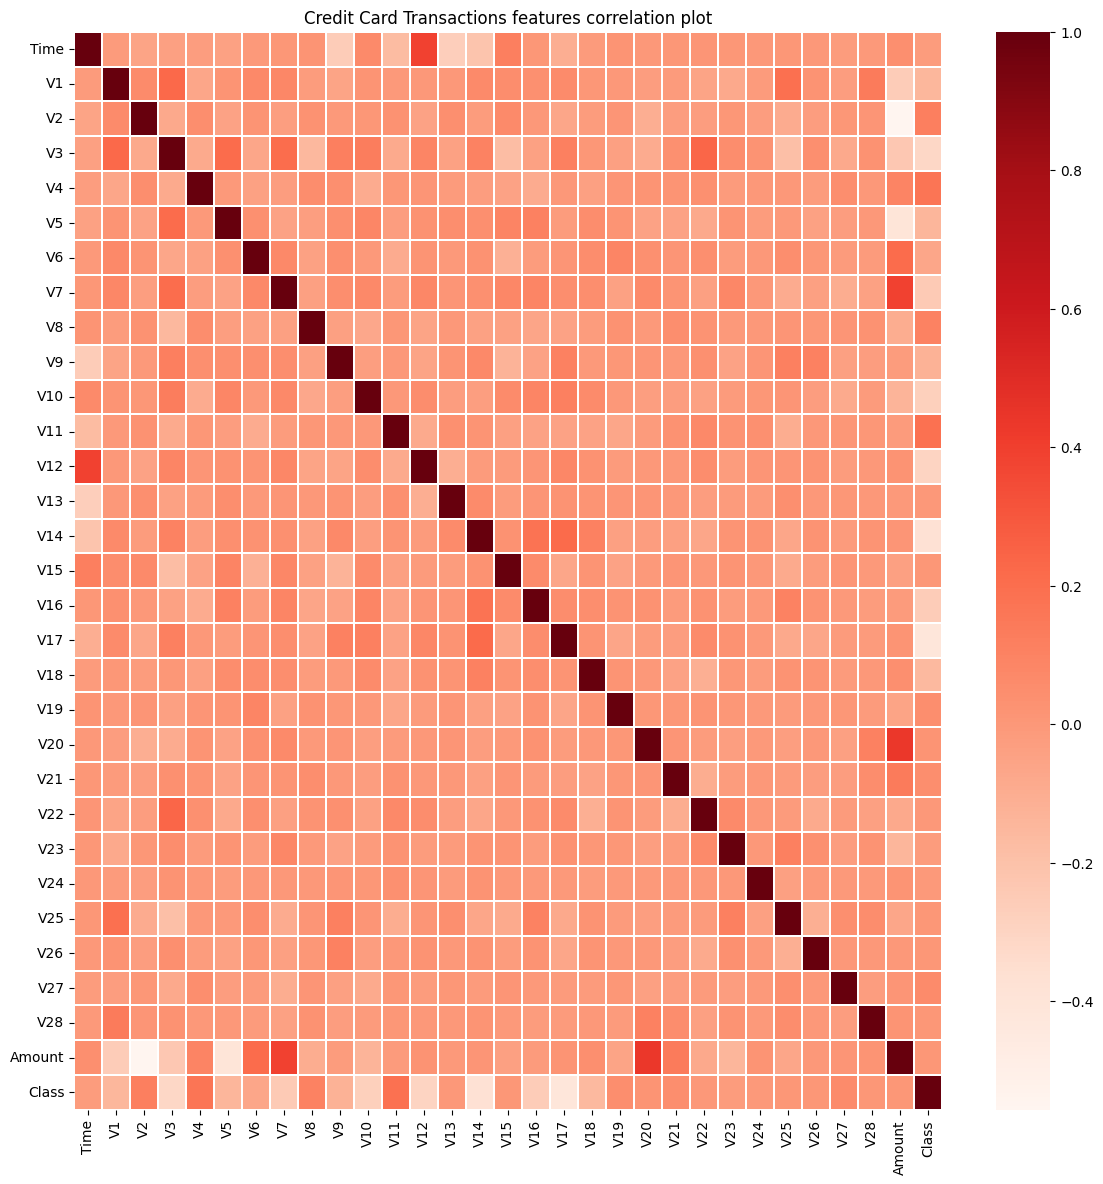

In [25]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

/tmp/ipython-input-1692636650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.index, y=corr_target.values, palette="Reds")


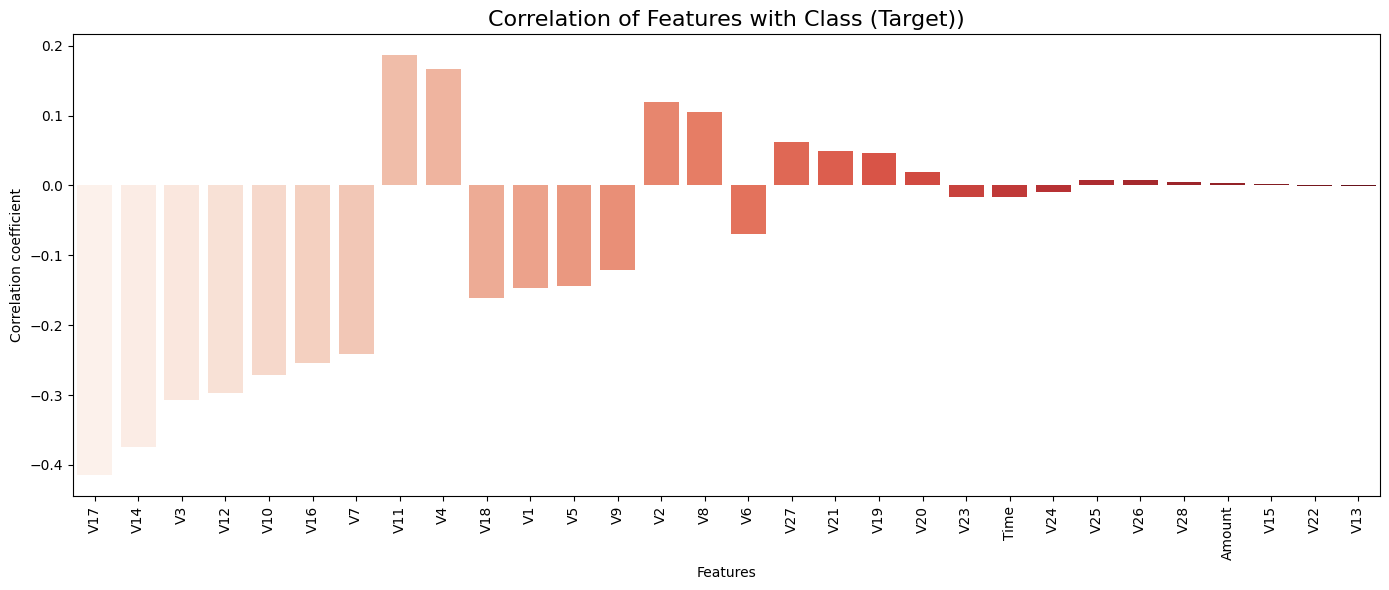

In [26]:
#Plotting
plt.figure(figsize=(14, 6))
plt.title("Correlation of Features with Class (Target))", fontsize=16)
corr_target = df.corr()["Class"].drop("Class")
corr_target = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)
sns.barplot(x=corr_target.index, y=corr_target.values, palette="Reds")
plt.xticks(rotation=90)
plt.ylabel("Correlation coefficient")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


***Data Preprocessing***

In [28]:
#Scaling features
scaler = StandardScaler()
df[["Amount", "Time"]] = scaler.fit_transform(df[["Amount", "Time"]])

Class Distribution:
 Class
0.0    98521
1.0      222
Name: count, dtype: int64


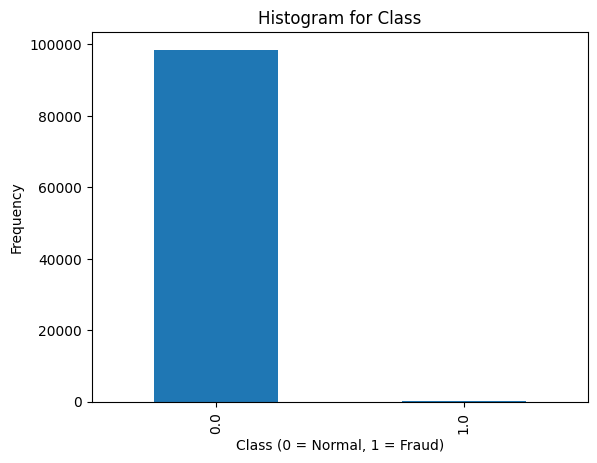

In [30]:
# Class distribution
data = df.copy()
data.drop_duplicates(inplace=True)

count_classes = data['Class'].value_counts()
print("Class Distribution:\n", count_classes)

count_classes.plot(kind='bar')
plt.title("Histogram for Class")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Frequency")
plt.show()

In [31]:
# Separate normal and fraud
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [32]:
# Downsample normal transactions
normal_downsample = normal.sample(n=len(fraud), random_state=42)
downsample_data = pd.concat([normal_downsample, fraud], ignore_index=True)
print("\nDownsampled Distribution:\n", downsample_data['Class'].value_counts())


Downsampled Distribution:
 Class
0.0    222
1.0    222
Name: count, dtype: int64


***3. Feature-Target Split***

In [33]:
#Feature and Target for downsampled data
X_down = downsample_data.drop('Class', axis=1)
y_down = downsample_data['Class']

In [37]:
# Check for NaNs in target
print(y.isna().sum())

# Drop rows where 'Class' is NaN
data = data.dropna(subset=['Class'])

1


In [38]:
#Feature and Target for Original data
X = data.drop('Class', axis=1)
y = data['Class']

In [39]:
# Apply SMOTE oversampling
X_over, y_over = SMOTE().fit_resample(X, y)
print("\nAfter SMOTE Oversampling:\n", y_over.value_counts())


After SMOTE Oversampling:
 Class
0.0    98521
1.0    98521
Name: count, dtype: int64


In [40]:
#Just Checking for NaN values in both Feature and Target Variables
print("NaNs in features:", X.isna().sum().sum())
print("NaNs in target:", y.isna().sum())

NaNs in features: 0
NaNs in target: 0


In [41]:
# Train-test splits
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(
    X_down, y_down, test_size=0.2, random_state=42
)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over, y_over, test_size=0.2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

***4. Models***

In [42]:
# Using Decision Tree, Random Forest, Logistic Regression
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

***5. Training & Evaluation***

In [43]:
def evaluate_model(name, clf, X_train, y_train, X_test, y_test, dataset_name):
    # Fit the model on the training set
    clf.fit(X_train, y_train)

    # Predict labels on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

     # Print results in a clean format
    print(f"\n{name} ({dataset_name})")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix (visualizing True/False positives/negatives)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Normal", "Fraud"],  # Predicted labels
                yticklabels=["Normal", "Fraud"])  # Actual labels
    plt.title(f"Confusion Matrix - {name} ({dataset_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Decision Tree (SMOTE Oversampled)
Accuracy: 0.9985
Precision: 0.9976
Recall: 0.9994
F1 Score: 0.9985


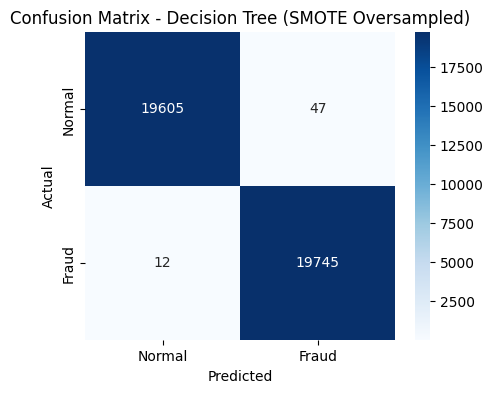


Decision Tree (Downsampled)
Accuracy: 0.9438
Precision: 0.9130
Recall: 0.9767
F1 Score: 0.9438


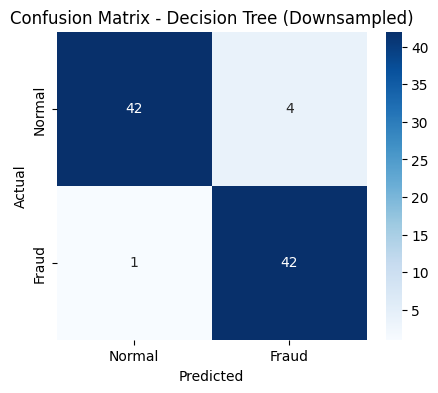


Decision Tree (Original)
Accuracy: 0.9990
Precision: 0.8163
Recall: 0.7843
F1 Score: 0.8000


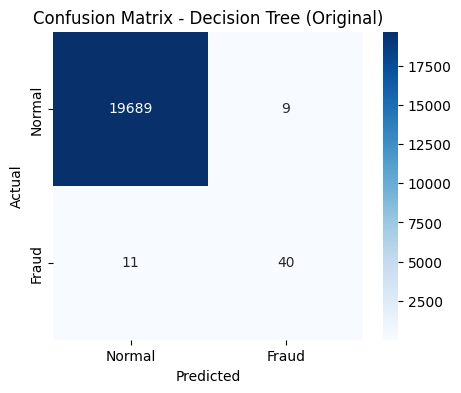

In [ ]:
# Evaluate all classifiers in order
for name, clf in classifiers.items():
    evaluate_model(name, clf, X_train_over, y_train_over, X_test_over, y_test_over, "SMOTE Oversampled")
    evaluate_model(name, clf, X_train_down, y_train_down, X_test_down, y_test_down, "Downsampled")
    evaluate_model(name, clf, X_train, y_train, X_test, y_test, "Original")